(FirstLawOpen)=
# First Law of Thermodynamics - Open Systems

```{index} open systems, flow work, mass flowrate, volumetric flowrate
```

In the previous two chapter's {numref}`FirstLaw` {ref}`FirstLaw` and {numref}`FirstLawApplications` {ref}`FirstLawApplications`, we were focused on applying the energy conservation equation to closed systems, where there was no mass exchange with the surroundings. However, there are many thermodynamic systems where accounting for the mass transfer and energy transfer is critical, such as  turbines, mixing chambers, and so on. Recall that these are considered {ref}`open systems <genindex>`. To evaluate open systems, the energy conservation equation for a closed system is modified to account for the energy content of the mass entering and/or leaving the system. Further, a new concept called {ref}`flow work <genindex>` will have to be acocunted for, which is related to the work done by or to the fluid entering or leaving the system, and is the force behind it's movement. 

## Flow Work

Flow work is the work required to push a fluid into the control volume (recall, a control volume is an open system), and work done by the system in the form of flow work to push fluid out. Consider the control volume below in {numref}`Figure %s <first law open fig a>` - the work required to push fluid into and out of the control volume can be evaluated by imagining a piston cylinder that the fluid is acting against.  

```{figure} Figures/flow_work.png
:name: first law open fig a

Exemplary open system with 1 inlet and 1 exit. The flow work is represented at the inlet side as an imaginary piston-cylinder. The flow work is the work required to push the fluid into the system and the work required to push the fluid out of the system. 
```

Recall, that the force ($F$) acting over an area ($A$) is pressure ($p$) and if the force is constant, the flow work ($W$<sub>flow</sub>) is equal to the force times distance, or 

```{math}
:label: eq_a
W_{\rm flow} = F \Delta x
``` 

Thus, for a piston with area $A$,  $W$<sub>flow</sub> is related to the pressure and volume ($V$) by,

```{math}
:label: eq_b
W_{\rm flow} = pA \Delta x = pV
``` 

and in terms of mass specific properties

```{math}
:label: eq_c
w_{\rm flow} = pv
``` 

The rate of flow work ($\dot W_{\rm flow}$) is the pressure times the {ref}`volumetric flowrate <genindex>`  ($\dot V$), or

```{math}
:label: eq_d
\dot W_{\rm flow} = p \dot V
``` 

where the volumetric flowrate is the {ref}`mass flowrate <genindex>`  times the specific volume.

```{math}
:label: eq_e
\dot V = \dot m v
``` 

## More on Mass Flowrate

```{index} mass flowrate, velocity
```

Mass flowrate is another new term that was not introdced in prior sections. It is defined as the amount of mass flowing through a cross section per unit time. In differential form, the mass flowrate ($\delta \dot m$) crossing a differential cross sectional area ($dA_{\rm c}$) is related to the density ($\rho$) and velocity normal to the cross sectional area ($\rm{V}_{\rm n}$).

```{math}
:label: eq_e1
\delta \dot m = \rho {\rm V_n} dA_{\rm c}
``` 

To determine the mass flowrate over a finite cross-sectional area ($A_{\rm c}$), the differential mass flowrate should be integrated over $A_{\rm c}$ - note the inexact differential that was discussed earlier in {numref}`FirstLaw` {ref}`FirstLaw`.

```{math}
:label: eq_e2
\dot m = \int_{A_{\rm c}} \delta \dot m
``` 

Therefore,

```{math}
:label: eq_e3
\dot m = \int_{A_{\rm c}} \rho \rm {V_n} dA_{\rm c}
``` 

For real systems, whether the flow is laminar or turbulent, the velocity over the inlet or exit diamater is not constant. In laminar flow systems, such as plug flow in a pipe, there is a velocity profile such that the maximum velocity occurs at the center and at the walls the velocity is equal to zero. This is depicted in {numref}`Figure %s <first law open fig b>`. Typically, an average velocity ($\rm {V_{avg}}$)  is used to enable straightforward evaluation of $\dot m$. $\rm {V_{avg}}$ is related to the velocity profile through the following equation. 

```{math}
:label: eq_e4
{\rm V_{avg}} = \frac{1}{A_{\rm c}} \int_{A_{\rm c}} {\rm V} (y)dA_{\rm c}
``` 

$\delta \dot m = \rho \rm {V_n} dA_{\rm c}$

Therefore, assuming constant density over the cross-sectional area, the mass flowrate can be related to the average velocity.

```{math}
:label: eq_e5
\dot m = \rho {\rm V_{avg}} A_{\rm c}
``` 

And combining with {eq}`eq_e`

```{math}
:label: eq_e6
\dot V = {\rm V_{avg}} A_{\rm c}
``` 

```{figure} Figures/velocity_profile.png
:name: first law open fig b

Exemplary velocity profile representative of simple plug flow, with maximum velocity at the center and velocity of zero at the walls. The velocity used in the energy equation is the average of this profile.
```

In the ensuing discussions, the velocity terms are all average velocity but the subscript is removed for brevity.

(MassFlowrate)=
#### Example - Calculating Mass Flowrates

N<sub>2</sub> gas flows in a 0.2 m diameter pipe at a uniform velocity of 0.1 $\frac{m}{s}$. $T$ = 25 °C and $p$ = 150 kPa. Determine $ṁ$, assuming steady state and ideal gas behavior. $M$<sub>N2</sub> = 28 kg 
kmol-1


> **Solution** First, we should recognize that we are provided temperature and pressure and thus have enough information to determine specific volume (i.e. density) at the given conditions. We also know the diameter, thus the area, and also are given the velocity> Therefore, we also have enough information to solve for the volumetric flowrate using {eq}`eq_e6`, or $\dot V = {\rm V_{avg}} A_{\rm c}$. Knowing volumetric flowrate and the specific volume we can then use {eq}`eq_e`, or $\dot V = \dot m v$, to solve for the mass flowrate.

> To determine specific volume we can either use the ideal gas equation or Cantera. For the sake of practice and to refresh your memory, lets do it both ways.

In [28]:
import cantera as ct
species1 = ct.Nitrogen()
species1.TP = 25+273.15,150000
spec_vol = round(species1.TV[1],4)
print("Specific volume using Cantera is ", spec_vol, "m^3/kg")

def vol(T,p,M):
    return 8.314/M*T/p
spec_vol=round(vol(298.15,150,28),4)
print("Specific volume using ideal gas law is ", spec_vol, "m^3/kg")

Specific volume using Cantera is  0.5898 m^3/kg
Specific volume using ideal gas law is  0.5902 m^3/kg


> Lets write {eq}`eq_e6` as a function to solve for $\dot V$

In [29]:
import numpy as np
def V_dot(vel,A):
    return vel*A
vol_rate = round(V_dot(0.1,np.pi*(.2/2)**2),4) # Note we needed to input the area in terms of our known diameter
print("The volumetric flowrate is ", vol_rate, "m^3/s") 

The volumetric flowrate is  0.0031 m^3/s


> Finally we can solve for $\dot m$ using {eq}`eq_e` $\dot V = \dot m v$

In [30]:
mass_flow = spec_vol*vol_rate
print("The mass flowrate is ", round(mass_flow,4), "kg/s") 

The mass flowrate is  0.0018 kg/s


Notice that we could have also used the ideal gas law in the form, which is $p \dot V = \dot m RT$, and omitted solving for the specific volume explicitly.

## Conservation of Mass

```{index} mass conservation, steady state
```

{ref}`Conservation of mass <genindex>` says that the difference between the mass that enters ($m_{\rm i})$ a system and leaves the system ($m_{\rm i})$ must be equal to the change in mass of the system ($\Delta m_{\rm sys}$).

```{math}
:label: eq_p
\Delta m_{\rm sys} = m_{\rm i}-m_{\rm e}
```

Conservation of mass in rate form analagously says that the rate of change of a system mass is equal to the difference in the inlet and exit mass flowrates. For multiple inlets and exits this is

```{math}
:label: eq_q
\frac {dm_{\rm sys}}{dt} = \sum \dot m_{\rm i} - \sum \dot m_{\rm e}
```

where the summation represents one or more inlets or exits. Any time the properties of a system do not change with time, the system is said to operate at {ref}`steady state <genindex>`. For example, a turbine which  produces power from an inlet stream of gas typically operates at steady state and the power output is constant with time. At any point in time the system properties (such as temperature, pressure, mass, internal energy, etc.) remain unchanged. That is not to say the inlet and exit properties cannot be different from each other - only that their properties with respect to their positions do not vary with time.  This implies that during steady state operation the system mass remains unchanged and thus the left hand side of equation {eq}`eq_q` is zero. Therefore, for a system at steady state the sum of the inlet flowrates should equal the sum of the exit flowrates.

```{math}
:label: eq_r
\sum \dot m_{\rm i} = \sum \dot m_{\rm e}
```

And for a single inlet, single outlet, control volume the mass flowrates entering and exiting are equal.

```{math}
:label: eq_s
\dot m_{\rm i} = \dot m_{\rm e} = \dot m
```

## Energy Conservation for Open Systems

In addition to heat transfer and boundary work interactions that were considered in the closed system energy conservation equation, flow work and energy content of the mass entering or leaving the system need to also be accounted for in open systems. We have already defined the flow work above. The energy $E$ of the mass that enters is it's specific energy content, $e$, scaled by the mass, $m$, or $E = em$. And further, this can be broken down into the individual components, internal energy ($U$), kinetic energy ($KE$) and potential energy ($PE$). These terms should not be confused with the system's energy which can also be broken down similarly. Thus, we can say the energy content that entered ($E$<sub>i</sub>) or exited ($E$<sub>e</sub>) the control volume is the following.

```{math}
:label: eq_g
E_{\rm i} = U_{\rm i} + KE_{\rm i} + PE_{\rm i}
``` 

```{math}
:label: eq_h
E_{\rm e} = U_{\rm e} + KE_{\rm e} + PE_{\rm e}
``` 

Now, we can add these terms to the closed system energy conservation equation. Recall, for a stationary system this was $\Delta U = Q_{\rm net}-W_{\rm net}$, where $W_{\rm net}$ does not include the flow work and is typically represented by boundary work, electrical work, etc. For a system with one inlet and one exit, adding the inlet and exit flow work and energy of the entering and exiting masses, the energy equation becomes the following.

```{math}
:label: eq_i
\Delta U = Q_{\rm net}-W_{\rm net} + W_{\rm flow,i}-W_{\rm flow,e} + E_{\rm i} - E_{\rm e}
``` 

And

```{math}
:label: eq_j
\Delta U = Q_{\rm net}-W_{\rm net} + p_{\rm i}V_{\rm i}-p_{\rm e}V_{\rm e} + (U_{\rm i}+\frac{1}{2}m_{\rm i}{\rm V_i}^2+m_{\rm i}gz_{\rm i}) - (U_{\rm e}+\frac{1}{2}m_{\rm e}{\rm V_e}^2+m_{\rm e}gz_{\rm e})
``` 

Recall that $H = U + pV$. Using this relationship, we can group the inlet and exit flow work terms with the inlet and exit internal energies, respectively, and simply call this the inlet and exit enthalpy. Below is the resulting generalized form of the energy conservation equation for open systems with a single inlet and exit.

```{math}
:label: eq_k
\Delta U = Q_{\rm net}-W_{\rm net} + (H_{\rm i}+\frac{1}{2}m_{\rm i}{\rm V_i}^2+m_{\rm i}gz_{\rm i}) - (H_{\rm e}+\frac{1}{2}m_{\rm e}{\rm V_e}^2+m_{\rm e}gz_{\rm e})
``` 

The rate form of the open system energy conservation equation, with one inlet and one exit, becomes.

```{math}
:label: eq_m
\frac {dU}{dt} = \dot Q_{\rm net} - \dot W_{\rm net} + \dot m_{\rm i} (h_{\rm i}+\frac{{\rm V_i}^2}{2}+gz_{\rm i}) - \dot m_{\rm e} (h_{\rm e}+\frac{{\rm V_e}^2}{2}+gz_{\rm e})
``` 

A more generalized form can be easily derived which is valid for an open system with multiple inlets and exits.

```{math}
:label: eq_n
\frac {dU}{dt} = \dot Q_{\rm net} - \dot W_{\rm net} + \sum \dot m_{\rm i} (h_{\rm i}+\frac{{\rm V_i}^2}{2}+gz_{\rm i}) -\sum \dot m_{\rm e} (h_{\rm e}+\frac{{\rm V_e}^2}{2}+gz_{\rm e})
``` 

For systems opreating at steady state left hand side of the energy conservation equation becomes zero, as shown below. 

```{math}
:label: eq_t
0 = \dot Q_{\rm net} - \dot W_{\rm net} + \sum \dot m_{\rm i} (h_{\rm i}+\frac{{\rm V_i}^2}{2}+gz_{\rm i}) -\sum \dot m_{\rm e} (h_{\rm e}+\frac{{\rm V_e}^2}{2}+gz_{\rm e})
``` 

And finally, the simplified steady state energy conservation equation for a control volume with a single inlet and exit is the following.

```{math}
:label: eq_u 
0 = \dot Q_{\rm net} - \dot W_{\rm net} + \dot m(h_{\rm i}-h_{\rm e}) + \dot m(\frac{{\rm V_i}^2}{2}-\frac{{\rm V_e}^2}{2}) +\dot m g(z_{\rm i} -z_{\rm e})
``` 

(OpenSystem)=
#### Example - Applying Open System Energy Equation

Nitrogen enters a horizontal 28 cm diameter pipe at 200 kPa and 20 °C with a velocity of 5 $\frac{\rm m}{\rm s}$. The nitrogen is heated as it flows through the pipe and exits at 180 kPa and 40 °C. Determine $\rm V_{\rm e}$ and $\dot V$<sub>e</sub> at the exit. Determine the rate of heat transfer to the nitrogen. Assume the system is at steady state. $M$<sub>N2</sub> = 28 $\frac {\rm kg} {\rm kmol}$.

> **Solution** In this example, the system is operating at steady state and there is only a single inlet and exit. Therefore, the open system energy conservation equation reduces to {eq}`eq_u`
$0 = \dot Q_{\rm net} - \dot W_{\rm net} + \dot m(h_{\rm i}-h_{\rm e}) + \dot m(\frac{{\rm V_i}^2}{2}-\frac{{\rm V_e}^2}{2}) +\dot m g(z_{\rm i} -z_{\rm e})$

> Because the pipe is horizontal there is no change in elevation and therefore the height terms cancel and can be disregarded. Further, there is no mention of boundary work and we can assume this to be negligable and can also be disregarded. Therefore, {eq}`eq_u` reduces further to.
$0 = \dot Q_{\rm net} + \dot m(h_{\rm i}-h_{\rm e}) + \dot m(\frac{{\rm V_i}^2}{2}-\frac{{\rm V_e}^2}{2})$

> We are provided the inlet temperatures and pressures and therefore have enough information to determine the enthalpies. We also know the inlet velocity. The remaining unknown terms are $\dot Q_{\rm net}$, $\dot m$, and ${\rm V_e}$. To help solve for $\dot m$ and ${\rm V_e}$ we can use the mass conservation equation {eq}`eq_s` and relationship between mass flowrate, velocity and area {eq}`eq_e5`. I.e.

> $\dot m_{\rm i} = \dot m_{\rm e}$

> $\rho_{\rm i} {\rm V_i} A_{\rm i} = \rho_{\rm e} {\rm V_e} A_{\rm e}$

> Finally, representing the density as inverse specific volume and assuming that the inlet and exit areas are equal, we find.

> $\frac {\rm V_i}{v_{\rm i}}  = \frac {\rm V_e}{v_{\rm e}}$, or
> ${\rm V_e} = {\rm V_i} \frac {v_{\rm e}}{v_{\rm i}}$

> Therefore, knowing the specific volumes at the inlet and exit, we can solve for the exit velocity. Since we know both temperature and pressure at both inlet and exit we can either use ideal gas law  or Cantera to solve for specific volumes. Solution using Cantera is below.

In [31]:
import cantera as ct
species1 = ct.Nitrogen()
Ti = 20 +273.15 # Define inlet T in K
Pi = 200000 # Define inlet P in Pa
Te = 40 + 273.15 # Define exit T in K
Pe = 180000 # Define exit P in Pa
species1.TP = Ti,Pi # set inlet T and P
vi = species1.TV[1] # determine inlet specific volume
print("Inlet Specific Volume = ", round(vi,3),"m^3")
species1.TP = Te,Pe # set exit T and P
ve = species1.TV[1]
print("Exit Specific Volume = ", round(ve,3), "m^3")
Vi = 5 # m/s, inlet velocity
Ve = Vi*ve/vi
print("Exit Velocity = ", round(Ve,3), "m/s")

Inlet Specific Volume =  0.435 m^3
Exit Specific Volume =  0.516 m^3
Exit Velocity =  5.937 m/s


> We can solve for the massflowrate at either the inlet or exit, knowing $\dot m = \rho {\rm V} A = \frac{1}{v} {\rm V} A$

In [32]:
import numpy as np
Ai = np.pi*(28/2/100)**2 # Solve for the inlet/exit area
m_dot = (1/vi)*Vi*Ai
print("Mass Flowrate = ", round(m_dot,3), "kg/s")

Mass Flowrate =  0.708 kg/s


> Finally we can solve for the heat transfer using our simpliefied form of the energy equation, i.e. $0 = \dot Q_{\rm net} + \dot m(h_{\rm i}-h_{\rm e}) + \dot m(\frac{{\rm V_i}^2}{2}-\frac{{\rm V_e}^2}{2})$, but first we need to determine the inlet and exit enthalpies. We will use Cantera just like we did for the specific volumes.

In [33]:
import cantera as ct
species1 = ct.Nitrogen()
Ti = 20 +273.15 # Define inlet T in K
Pi = 200000 # Define inlet P in Pa
Te = 40 + 273.15 # Define exit T in K
Pe = 180000 # Define exit P in Pa
species1.TP = Ti,Pi # set inlet T and P
hi = species1.TH[1] # determine inlet specific volume
print("Inlet Specific Enthalpy = ", round(hi,3),"J/kg")
species1.TP = Te,Pe # set exit T and P
he = species1.TH[1]
print("Exit Specific Enthalpy = ", round(he,3), "J/kg")
Q = -m_dot*(hi-he)-m_dot*(Vi**2/2-Ve**2/2)
print("The Net Heat Transfer Rate is = ", round(Q,3), "W or ", round(Q/1000,3), "kW")

Inlet Specific Enthalpy =  -5610.681 J/kg
Exit Specific Enthalpy =  15273.079 J/kg
The Net Heat Transfer Rate is =  14790.564 W or  14.791 kW


>Notice that the resulting heat transfer is positive, indicating that heat had to be transferred to the system. Which, given the fact that the temperature of the fluid increased going from the inlet to the exit, makes logical sense.

### Aside - Using Cantera for Other Pure Substances and Gas Mixtures Such as Air

You may have noticed that Cantera is limited to calling on a certain limited number of pure substances. These include such as Carbon Dioxide, Water, Nitrogen, Hydrogen, Oxygen and Helium (https://www.cantera.org/documentation/docs-2.6/sphinx/html/cython/importing.html). However, there are many situations where other pure substances (e.g. argon or methane) or gas mixtures, such as air (primarily N<sub>2</sub> and O<sub>2</sub>), are the working fluids of interest. Understanding gas mixtures is a more advanced topic that will be discussed in later sections, but for now we will introduce how to implement other pure substances and gas mixtures such as air using Cantera.

For this, we will have to rely on databases of gas mixtures that have been created and call them within the $Solution$ function that is contained within the Cantera package. We will rely primarly in the gri30 database. We can define a species like we did prior for pure substances (e.g. species1 = ct.Water()), but rather we call $Solution$ and within this function input 'gri30.yaml' which is our gas mixture database. Like below:  

In [34]:
import cantera as ct
species1 = ct.Solution('gri30.yaml')# define species1 as a mixture of gases defined in the gri30 database. 

If no mole or mass fractions are defined (which we have not done yet), by default the gas mixutre is composed of H<sub>2</sub>, as we can see below when we call species1.

In [35]:
species1()


  gri30:

       temperature   300 K
          pressure   1.0133e+05 Pa
           density   0.081894 kg/m^3
  mean mol. weight   2.016 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy             26469             53361  J
   internal energy       -1.2108e+06        -2.441e+06  J
           entropy             64910        1.3086e+05  J/K
    Gibbs function       -1.9447e+07       -3.9204e+07  J
 heat capacity c_p             14311             28851  J/K
 heat capacity c_v             10187             20536  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2                 1                 1           -15.717
     [  +52 minor]                 0                 0  



If we would rather define species1 to be 100% methane, this is done by defining the mole fraction $X$ as follows

In [36]:
species1.X = 'CH4:1' #Here we set the mixture to only be methane. I.e. CH4 mole fraction = 1.

Now when we call species1 we can see it is composed of only $\rm{CH}_4$.

In [37]:
species1()


  gri30:

       temperature   300 K
          pressure   12733 Pa
           density   0.081894 kg/m^3
  mean mol. weight   16.043 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy       -4.6459e+06       -7.4533e+07  J
   internal energy       -4.8013e+06       -7.7028e+07  J
           entropy             12706        2.0384e+05  J/K
    Gibbs function       -8.4576e+06       -1.3568e+08  J
 heat capacity c_p              2229             35761  J/K
 heat capacity c_v            1710.8             27446  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
               CH4                 1                 1           -54.397
     [  +52 minor]                 0                 0  



Then, defining temperature, pressure or other extensive properties remains as we have learned for pure substances. For example, to set the temperature to 1000 K and pressure to 100 kPa you can type the following.

In [38]:
species1.TP = 1000,100000 # define the temperature to be 100 K and pressure to be 100 kPa or 100000 Pa

To define gas mixtures such as air that are about 0.8 mole fraction N<sub>2</sub> and 0.2 mole fraction O<sub>2</sub>, we can simply define more species and their corresponding mole fractions when calling the mole fraction function $X$, like below.

In [39]:
species1.X = 'N2:0.8 O2:0.2' #Here we set the mixture to only be x= 0.8 N2 and x=0.2 O2.
species1()


  gri30:

       temperature   1000 K
          pressure   55684 Pa
           density   0.19295 kg/m^3
  mean mol. weight   28.811 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        7.5379e+05        2.1717e+07  J
   internal energy         4.652e+05        1.3403e+07  J
           entropy            8341.5        2.4033e+05  J/K
    Gibbs function       -7.5877e+06       -2.1861e+08  J
 heat capacity c_p            1151.9             33186  J/K
 heat capacity c_v            863.28             24872  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                O2           0.22213               0.2           -28.774
                N2           0.77787               0.8           -25.672
     [  +51 minor]                 0                 0  



## Some Typical Steady State Devices

```{index} steady state devices
```

Our discussion of the open system energy conservation equation ended with a consideration of steady state operation where the left hand side of the energy equation is set to zero because the internal energy of the system is constant with time. The general form with multiple inlets and exits is below and was discussed in {eq}`eq_t`.

$0 = \dot Q_{\rm net} - \dot W_{\rm net} + \sum \dot m_{\rm i} (h_{\rm i}+\frac{{\rm V_i}^2}{2}+gz_{\rm i}) -\sum \dot m_{\rm e} (h_{\rm e}+\frac{{\rm V_e}^2}{2}+gz_{\rm e})$

Although there are potentially many terms to consider in this equation, in practice there are usually many that can be neglected, either because they are not pertinant or because they are insignificant relative to the other terms. Some typical examples include the following below. Note that we will go through examples later that will provide more context if the significance is not evident yet.
1. Single inlet and exit systems. In this case,  the mass flowrate entering and exiting should be equal, as discussed prior. 
1. Inlets and exits that are at the same elevation (e.g. horizontal pipe flow). In this case then there is no change in height and the potential energy terms can be neglected. Further, there are several cases where the inlets and exits may be at different heights, but the potential energy change is still small relative to the other energy terms and can thus be neglected. For example in turbines (discussed later in this chapter), the inlet and exit heights are often neglected because the overall change in potential energy is often more than an order or magnitude lower than the shaft work terms.
1. Inlets and exits that are similar in area. In this case the kinetic energy terms can usually (but not always) be neglected because the change in kinetic energy is often small relative to the other energy terms.
1. Adiabatic systems. In this case, the system is assumed to be perfectly insulated and there is no heat transfer. This is often applied for turbines, compressors and other shaft work devices (discussed later in this chapter).
1. No shaft work. For devices such as nozzles and throttling devices (also discussed later in this chapter), there is no work done by or to the system and thus the work term can be negelected. Also, these devices are often adiabatic.

### Single Inlet and Exit Steady State Control Volumes

#### Pipes

```{index} pipe flow
```

A simple horizontal {ref}`pipe flow <genindex>` system is shown below in {numref}`Figure %s <first law fig c>` in which a fluid enters and exits the device through equal cross sectional areas and elevations.  Because there is a single inlet and exit, inlet and exit mass flowrates are idential because of mass conservation. Typically, there is no shaft work in pipe flow applications and this is indicated to be equal to zero. Depending on the application, tere may be energy transfer to or from the system in the form of heat transfer. In this example, the system is not adiabatic because heat transfer is indicated in the direction of the control volume. As mentioned above, we can often neglect changes in kinetic energy for systems like this with constant cross sectional area. 

```{figure} Figures/pipe_flow.png
:name: first law fig c

Exemplary pipe-flow open system with 1 inlet and 1 exit. 
```

As mentioned above, we can often neglect changes in kinetic energy for systems like this with constant cross sectional area. This is not to say that the velocity change is negligible - rather for kinetic energy changes to be considered the velocity change typically has to be large, for example by an order or magnitude. And because of the relationship shown in {eq}`eq_e5`, i.e., $\dot m = \rho {\rm V} A$, recognizing that $\dot m_{\rm i} = \dot m_{\rm e}$ and $A_{\rm i} = A_{\rm e}$, then the density change is propotional to the change in velocity. Thus, unless the change in density is very large, for example because the temperature change due to heat transfer is very large, we can usually neglect. Lets see why with a follow up to example {ref}`OpenSystem` above.

(Pipe_Flow)=
##### Example - Understanding Assumptions about Neglecting KE

From the example {ref}`OpenSystem` above, compare the change in enthalpy to the change in kinetic energy. 

> Recall the prior question from before: Nitrogen enters a horizontal 28 cm diameter pipe at 200 kPa and 20 °C with a velocity of 5 $\frac{\rm m}{\rm s}$. The nitrogen is heated as it flows through the pipe and exits at 180 kPa and 40 °C. Determine $\rm V_{\rm e}$ and $\dot V$<sub>e</sub> at the exit. Determine the rate of heat transfer to the nitrogen. Assume the system is at steady state. $M$<sub>N2</sub> = 28 $\frac {\rm kg} {\rm kmol}$. 

> This could be done one of a few ways. One way, for example, would be to calculate the change in kinetic energy with the simplified form of the energy equation that results after simplification. $0 = \dot Q_{\rm net} + \dot m(h_{\rm i}-h_{\rm e}) + \dot m(\frac{{\rm V_i}^2}{2}-\frac{{\rm V_e}^2}{2})$

> We determined that $Q$ = 14790.6 W, $h_{\rm i}$ = -5610.681 J/kg, $h_{\rm e}$ =  15273.079 J/kg and $\dot m$ = 0.708 kg/s. Therefore we can readily calculate $\Delta \rm KE$ by 

> $\Delta \rm KE = -\dot Q_{\rm net} - \dot m(h_{\rm i}-h_{\rm e})$

In [40]:
Delta_KE = -14790.6 - .708*(-5610.681-15273.079)
print("The change in kinetic energy is " , round(Delta_KE,2), "J/s")

The change in kinetic energy is  -4.9 J/s


> Of course we could have calculated the  $\Delta \rm KE$, since we calculated that the exit velocity was $\rm V_{\rm e}$ = 5.937 m/s and we were given the inlet which was $\rm V_{\rm i}$ = 5.937 m/s

In [41]:
Delta_KE = 0.5*0.708*(5**2-5.937**2)
print("The change in kinetic energy is " , round(Delta_KE,2), "J/s")

The change in kinetic energy is  -3.63 J/s


The differences between the two approaches are presumably due to rounding differences. Regardless, it is nearly negligable compared to the change in enthalpy, which is 

In [42]:
Delta_h = .708*(-5610.681-15273.079)
print("The change in enthalpy is " , round(Delta_h,2), "J/s")

The change in enthalpy is  -14785.7 J/s


> One common error regarding units is when $\rm \Delta KE$ is compared to heat transfer or enthalpy in units kJ or kW. This is because when calculating KE, the units are $\rm kg \frac {\rm m^2}{\rm s^2}$, or $\rm J$ (recall that $\rm J=Nm$, or $\rm kg \frac {\rm m^2}{\rm s^2}$). Therefore, the units are off by a factor of 1000 if the velocity used is in m/s.

#### Nozzles and Diffusers

```{index} nozzle, diffuser
```

{ref}`Nozzles <genindex>` and {ref}`diffusers <genindex>` are two types of steady state devices that have different cross-sectional areas at the inlets and exits, and are designed to accelerate (in the case of a nozzle) or decelerate (in the case of a diffuser) the velocity of a fluid. These are shown below in {numref}`Figure %s <first law fig d>`. 

```{figure} Figures/nozzle_diffuser.png
:name: first law fig d

Exemplary nozzle (left) and diffuser (right) steady state control volumes. 
```

Similar to pipes, there is typically no shaft work to consider, and the inlets and exits are at the same elevation and therefore potential energy changes can be disregarded. These systems are usually adiabatic and the inlet and exit mass flowrates are equal because of mass conservation. Therefore, our steady state open system energy conservation equation, with a single inlet and exit, as shown below, can be greatly simplified from

$0 = \dot Q_{\rm net} - \dot W_{\rm net} + \dot m(h_{\rm i}-h_{\rm e}) + \dot m(\frac{{\rm V_i}^2}{2}-\frac{{\rm V_e}^2}{2}) +\dot m g(z_{\rm i} -z_{\rm e})$

to 

$\frac{{\rm V_e}^2}{2}-\frac{{\rm V_i}^2}{2} = h_{\rm i}-h_{\rm e}$

#### Throttles

```{index} throttle
```

{ref}`Throttling valves <genindex>` are devices designed to decrease the pressure of a fluid without any resulting energy interactions with the surroundings; i.e., they are usually adiabatic and there is no shaft work. This is typically acheived by restricting the flow by means of a valve or porous plug, as seen below in {numref}`Figure %s <first law fig e>`. 

```{figure} Figures/throttle.png
:name: first law fig e

Exemplary throttle, represented here as a porous plug. A throttle is a steady state control volume designed to decrease the pressure of a fluid. 
```

In many cases, there is a phase change that occurs during the throttling process, from a liquid-vapor mixture to vapor. The inlet and exit areas are the same and therefore, like pipe flow, we can usually disregard changes in kinetic energy. Further, changes in potential energy can be disregarded and inlet and exit flowrates are identical because of mass conservation. Appling these assumptions to the steady state open system energy conservation equation with a single inlet and exit, shown below,

$0 = \dot Q_{\rm net} - \dot W_{\rm net} + \dot m(h_{\rm i}-h_{\rm e}) + \dot m(\frac{{\rm V_i}^2}{2}-\frac{{\rm V_e}^2}{2}) +\dot m g(z_{\rm i} -z_{\rm e})$

 $h_{\rm i} = h_{\rm e}$. 

Simply put, the enthalpies at the inlet and exit are equivilent. For ideal gases then this means that the temperature remains unchanged, but for real gases there is a corresponding increase in exit temperature as the pressure decreases. Lets see why this is the case. Imagine a liquid vapor mixutre of H<sub>2</sub>O enters a throttle at 1 MPa with a quality of 0.5 and exits at 10 kPa. 

In [43]:
import cantera as ct
species1 = ct.Water()
species1.PQ = 100*10**5,0.5
print("At 1 MPa and x = 0.5, the temperature is ", round(species1.TH[0],2), "K and the enthalpy is ", round(species1.TH[1]/1000,2), "kJ")

At 1 MPa and x = 0.5, the temperature is  584.24 K and the enthalpy is  -13904.53 kJ


Now that we know the enthalpy at state 2, as well as the pressure, which was given, this state is fully defined and thus we can calculate the temperature (or any other state property).

In [44]:
import cantera as ct
species1 = ct.Water()
species1.HP = -13904.53*1000, 10*1000 #multiply both by 1000 to get units J and Pa
print("For an exit pressure of 10 kPa, the temperature is ", round(species1.TH[0],2), "K")

For an exit pressure of 10 kPa, the temperature is  319.0 K


#### Turbines and Compressors

```{index} turbine, compressor
```

{ref}`Turbines <genindex>` are steady-state, adiabatic devices that produce shaft work through the expansion of a gas or fluid across a series of blades connected to the rotating shaft. As a result of the expansion and corresponding net output in shaft work, there is a corresponding decrease in temperature and pressure of the working fluid. A schematic of a turbine is shown in {numref}`Figure %s <first law fig f>`  on the left. Notice that the inlet area is smaller than the exit area as a result of expansion. Often, the change in kinetic energy and potential energy is negligable compared to the change in enthalpy of the fluid, especially in gas and vapor turbines, but not always. For example, changes in potential energy do need to be considered for liquid turbines, such as those operating in pumped-hydro facilties. {ref}`Compressors <genindex>`, on the other hand, which are seen on the right side of {numref}`Figure %s <first law fig f>`, are adiabatic steady state devices designed to increase the pressure of the working fluid by applying shaft work to a gas. In contrast to a turbine, in which the working fluid can be gas, vapor or liquid, compressors are only used to increase the pressure of gases. The inlet area is larger than the exit area, and there is also an accompanying increase in temperature of the working fluid. Often, the change in kinetic energy and potential energy is negligable compared to the change in enthalpy of the fluid.  

```{figure} Figures/turbine_compressor.png
:name: first law fig f

Exemplary turbine (left) and compressor (right). These are both adiabatic steady state devices that incorporate shaft work and result in a large change in pressure and enthalpy of the working fluid. 
```

For both turbines and compressors, the single inlet/exit steady state energy equation, shown below

$0 = \dot Q_{\rm net} - \dot W_{\rm net} + \dot m(h_{\rm i}-h_{\rm e}) + \dot m(\frac{{\rm V_i}^2}{2}-\frac{{\rm V_e}^2}{2}) +\dot m g(z_{\rm i} -z_{\rm e})$

can be reduced assuming they are adiabatic and that changes in kinetic energy and potential energy are negligable compared to changes in enthalpy. Under these assumptions the energy equation becomes the following.

$\dot W_{\rm net} = \dot m(h_{\rm i}-h_{\rm e})$

Lets consider an example that compares the magnitude of the change in kinetic energy terms to the change in enthalpy to see why we can often negelect changes in velocity.

(turbines)=
#### Example - Understanding Assumptions about Neglecting KE and PE changes in Turbines and Compressors

A steam turbine inlet conditions are 5 MPa, 500 <sup>o</sup>C, and 80 m/s. The exit conditions are 30 kPa, 90 % quality, and 50 m/s. The mass flowrate of the steam is 12 kg/s. Determine a) change in kinetic energy, b) the change in enthalpy, c) the power output and d) the turbine inlet area

> a) We can readily calculate the change in kinetic enery knowing the mass flowrate and inlet/exit velocities. 

In [45]:
delta_KE = 0.5*12*(80**2-50**2)
print("The change in kinetic energy is ", delta_KE, "J/s")

The change in kinetic energy is  23400.0 J/s


> b) We know two independent properties at the inlet and exit of the turbine, thus these states are fully defined and we can therefore use Cantera to determine the specific enthalpy at the inlet and exit.

In [46]:
import cantera as ct
species1 = ct.Water()
Ti = 500+273.15 # K, temperature at inlet
Pi = 5*1000*1000 # Pa, pressure at inlet
Pe = 30*1000 # Pa, pressure at exit
xe = 0.9 # quality at exit
species1.TP = Ti,Pi
hi=species1.TH[1] # specific enthalpy at inlet, kJ/kg
print("Specific enthalpy at the inlet is ", round(hi/1000,2), "kJ")
species1.PQ = Pe,xe
he=species1.TH[1] # specific enthalpy at exit, kJ/kg
print("Specific enthalpy at the exit is ", round(he/1000,2), "kJ")

Specific enthalpy at the inlet is  -12537.03 kJ
Specific enthalpy at the exit is  -13579.04 kJ


> Knowing the specific enthalpies, we can determine the change in enthalpy by multiplying their difference times the mass flowrate of steam.

In [47]:
delta_H = 12*(hi-he)
print("The change in enthalpy is ", round(delta_H,2), "J/s, or ", round(delta_H/1000/1000,2), "MJ/s")

The change in enthalpy is  12504141.43 J/s, or  12.5 MJ/s


> Therefore, we can see that the change in enthalpy is about one order of magnitude larger than the change in kinetic energy

> c) If we assume we can neglect changes in kinetic energy, based off of our results from parts a and b, then the power output is simply $\dot W_{\rm net} = \dot m(h_{\rm i}-h_{\rm e})$, which we have determined already in part b.

In [48]:
work = 12*(hi-he)
print("The power output is ", round(work,2), "J/s, or ", round(work/1000/1000,2), "MJ/s or MW")

The power output is  12504141.43 J/s, or  12.5 MJ/s or MW


> d) To calculate the inlet turbine area we can recall the equation {eq}`eq_e5` which says $\dot m = \rho {\rm V} A$. Thus, knowing the density, or specific volume of the steam at the inlet, we can solve for the area. And since we already determined that the inlet state is fully defined, we can also use cantera to help us solve for the inlet specific volume.

In [49]:
import cantera as ct
species1 = ct.Water()
Ti = 500+273.15 # K, temperature at inlet
Pi = 5*1000*1000 # Pa, pressure at inlet
mi = 12 # kg/s, mass flowrate at inlet/exit
Vi = 80 # m/s, inlet velocity
species1.TP = Ti,Pi
vi=species1.TV[1] # specific volume at inlet, m^3/kg
print("Specific volume at the inlet is ", round(vi,3), "m^3/kg")
A = mi*vi/Vi
print("The inlet area is ", round(A,3), "m^2")

Specific volume at the inlet is  0.069 m^3/kg
The inlet area is  0.01 m^2


#### Pumps

```{index} pump
```

{ref}`Pumps <genindex>`, shown below in {numref}`Figure %s <first law fig g>` are single inlet single exit steady state devices with a purpose similar to compressors; i.e., they are designed to increase the pressure of a fluid. However, in contract to compressors which increase the pressure of a gas, pumps can move both gases and liquids. For the purposes of this text, we will evaluate pumps almost exclusively with liquids, and thus can make liquid approxomations because of incompressibility. Pumps are typically treated as adiabatic systems, like compressors, and the velocity change contributing to changes in kinetic energy are usually negligable. The change in potential energy is often neglected because it is much smaller than the enthalpy change of the fluid, but this assumption is not good in cases of large elevation changes, for example in pump-hydro applications. 

```{figure} Figures/pump.png
:name: first law fig g

Exemplary pump, which is treated as a steady state, adiabatic device designed to increase the pressure of the working fluid. 
```

Neglecting both kinetic energy and potential energy terms, our energy equation becomes the same as for turbines and compressors, i.e.

$\dot W_{\rm net} = \dot m(h_{\rm i}-h_{\rm e})$

Notice in {numref}`Figure %s <first law fig g>` that the inlet and exit temperatures are shown to be close to each other. In fact, compared to compressors, there is usually only a very small increase in temperature as pressure increases. And although the exit temperature will be higher, it is often assumed to be equal to the inlet because of limited compressed liquid data available in tabulated form. Since we will be using Cantera this is not an issue for this text, but it is worth taking some time to discuss the implications of these assumptions. We discussed prior in {numref}`LiquidApproximation` {ref}`LiquidApproximation`, that $v$ and $u$ are functions of temperature only and independent of pressure for incomressible substances. Assuming liquid incompressibility can help us evaluate pumping work in the absense of some compressed liquid data. First, recalling the definition of enthalpy and differentiating, we see the following.

$h = u + pv$

$dh = du + pdv + vdp$

Becuase of our liquid approximations for incompressible substances, we can equate $du$ and $dv$ terms to zero. Therefore,

$dh = vdp$

and upon integration, recognizing that  $v$ is a function of temperature only for incompressible substances we see that

```{math}
:label: eq_u
\Delta h = v \Delta p
``` 

We can use either the temperature at the inlet or exit to determine specific volume because the difference is usually negligable. Therefore, for pumps, when assuming incompressibility, we can also relate the work to the change in pressure of the fluid.

$\dot W_{\rm net} = \dot m v(p_{\rm i}-p_{\rm e})$

Lets consider an example to see how this assumption will affect the pumping work.

(pumps)=
#### Example - Assuming Incompressibility Versus a Real Fluid

Determine the specific work of a pump that increases the pressure of water from 1 bar, 25 <sup>o</sup>C, to 10 MPa, with negligable temperature change. Assume the water is a) incompressible and b) a real substance

> a) We can readily calculate the speicifc work assuming incompressibility using our equation above in specific work form, $w_{\rm net} = v(p_{\rm i}-p_{\rm e})$. We just need to be careful of using correct units

In [50]:
import cantera as ct
pi = 100 #kPa, i.e. 1 bar  = 100 kPa
pe = 10*1000 #kPa
Ti = 25+273.15 # K
species1 = ct.Water()
species1.TP = Ti,pi*1000 # here we can set the pressure to be either the inlet or exit since we are assuming incompressibility
vi = species1.TV[1] # specific volume in m^3/kg
print("The specific volume of the incompressible fluid is ", round(vi,3), "m^3/kg")
w = vi*(pi-pe)
print("The specific work of the pump is", round(w,2), "kJ/kg")

The specific volume of the incompressible fluid is  0.001 m^3/kg
The specific work of the pump is -9.93 kJ/kg


> b) If we cannot assume incompressibility, we need to determine enthaly at the inlet and exit to determine the specific work. Because we know two properties at each state, we have enough information. The relevant equation in specific work form is $w_{\rm net} = (h_{\rm i}-h_{\rm e})$.

In [51]:
import cantera as ct
pi = 100 #kPa, i.e. 1 bar  = 100 kPa
pe = 10*1000 #kPa
Ti = 25+273.15 # K
Te = Ti
species1 = ct.Water()
species1.TP = Ti,pi*1000 # here we have to set the pressure to be the inlet pressure because we are not assuming incompressibility
hi = species1.TH[1] # specific enthalpy in J/kg
print("The specific enthalpy at the inlet is ", round(hi,3), "J/kg")
species1.TP = Te,pe*1000 # here we have to set the pressure to be the exit pressure because we are not assuming incompressibility
he = species1.TH[1] # specific enthalpy in J/kg
print("The specific enthalpy at the exit is ", round(he,3), "J/kg")
w = hi-he
print("The specific work of the pump is", round(w/1000,2), "kJ/kg")

The specific enthalpy at the inlet is  -15865848.172 J/kg
The specific enthalpy at the exit is  -15856713.991 J/kg
The specific work of the pump is -9.13 kJ/kg


> We can see that the specific work of the pump assuming H<sub>2</sub>O is a real substance is about 10% less than for the case of incompressibility. While this is not negligable, when we begin to evaluate larger processes where the pump is only a small component, this term is usually relatively small compared to other more energy intensive components such as boilers and turbines.

### Multiple Inlet and Exit Steady State Control Volumes

```{index} heat exchanger, mixing chamber
```

There are several examples of steady state devices with multiple inlets and/or exits. Common examples include {ref}`heat exchangers <genindex>` and {ref}`mixing chambers <genindex>` which are discussed in more detail below.

#### Heat Exchangers

```{index} heat exchanger
```

A {ref}`heat exchanger<genindex>` is a steady state flow device design to heat or cool a fluid through heat transfer. The fluid can be a gas, liquid, liquid-vapor mixture and undergo phase change during the heating or cooling process. Often, heat exchangers are designed with two separate fluid streams each with an inlet and exit, such that there is thermal contact (i.e., heat transfer) from one fluid (hot side) to another (cold side). The fluid flows can be counter to each other, in a so-called counter-flow heat exchanger, or parallel to each other, and with various configurations. The design and configuration of heat exchangers is beyond the scope of this text and we will consider them only from a control-volume perspective. For counter-flow heat exchangers, they are often assumed adiabatic, meaning there is no net-heat transfer to or from the system at large. But, as mentioned, there is internal heat transfer from one fluid to another, and if the control volume were drawn around the specific fluid of interest then heat transfer would need to be considered. An exemplary heat exchanger is shown below in {numref}`Figure %s <first law fig h>`. In this example, the flows are counter to each other and there are two total inlets and exits to consider in the control volume. And although the heat exchanger is typically drawn this way, heat exchangers can also have only a single inlet and exit and include external heat transfer.

```{figure} Figures/heat_exchanger.png
:name: first law fig h

Exemplary counter flow heat exchanger, which is treated as a steady state, adiabatic device, with two separate fluid streams in thermal contact, each with their own inlet and exit. 
```

Typical assumptions used to simplify the open system energy conservation equation are no boundary/shaft work, and negligable changes in kinetic and potential energies of each fluid stream. Starting with {eq}`eq_t`, the form of the steady state, open system energy equation with multiple inlets and exits, shown below

$0 = \dot Q_{\rm net} - \dot W_{\rm net} + \sum \dot m_{\rm i} (h_{\rm i}+\frac{{\rm V_i}^2}{2}+gz_{\rm i}) -\sum \dot m_{\rm e} (h_{\rm e}+\frac{{\rm V_e}^2}{2}+gz_{\rm e})$

this can be reduced to the simplified form below, in the case of counter flow heat exchangers like {numref}`Figure %s <first law fig h>`.

$\dot m_{\rm 1} (h_{\rm 1}-h_{\rm 2}) = \dot m_{\rm 2} (h_{\rm 4}-h_{\rm 3})$

Also, if the control volume were to be drawn around only a single fluid element, for example the top in red, we could also show the following. 

$\dot Q_{\rm net} =  \dot m_{\rm 1} (h_{\rm 1}-h_{\rm 2})$ 

#### Mixing Chambers and Separators

```{index} mixing chamber, separator
```

A {ref}`mixing chamber<genindex>` is a steady state flow device design to bring two or more streams into thermal equilibrium with one another by combining their fluid flows. This is in contrast to heat exchangers where the fluids are only in thermal contact with one another, but there is no mixing of substances. The fluids can be gas, liquid, liquid-vapor mixture and leave as any of these. An exemplary mixing chamber is shown below in {numref}`Figure %s <first law fig i>`. In this example, two streams enter and combine into a single exit stream. As a result of mass conservation, the two inlet mass flowrates must be equal to the exit mass flowrate. Typical assumptions used to simplify the open system energy conservation equation are no boundary/shaft work, adiabatic (i.e. only internal heat transfer) and negligable changes in kinetic and potential energies of each fluid stream. Similar to mixing chambers are {ref}`separation devices<genindex>`, that often have a single inlet and multiple outlets. These are useful in cases where saturated liquid-vapor mixtures are to be separated by supplying an outlet at the bottom for condensate and at the top for the vapor fraction.

```{figure} Figures/mixing_chamber.png
:name: first law fig i

Exemplary mixing chamber, which is treated as a steady state, adiabatic device. Here, it is shown with two separate fluid inlets and a single exit. 
```

 Starting with {eq}`eq_t`, the form of the steady state, open system energy equation with multiple inlets and exits, shown below

$0 = \dot Q_{\rm net} - \dot W_{\rm net} + \sum \dot m_{\rm i} (h_{\rm i}+\frac{{\rm V_i}^2}{2}+gz_{\rm i}) -\sum \dot m_{\rm e} (h_{\rm e}+\frac{{\rm V_e}^2}{2}+gz_{\rm e})$

this can be reduced to the simplified form below, in the case of two inlets and one exit mixing chambers, like shown in {numref}`Figure %s <first law fig h>`.

$\dot m_{\rm 1} h_{\rm 1} + \dot m_{\rm 2} h_{\rm 2} = \dot m_{\rm 3} h_{\rm 3}$, where

$\dot m_{\rm 1} + \dot m_{\rm 2} = \dot m_{\rm 3} $

## Transient Considerations

Until this point we have only considered steady state devices where the fluid properties are not changing with time. Unsteady flow devices are considerably more difficult to analyze because the properties at the inlet and exit may be changing with time, in addition to the system as a whole. In order to simplify calculations, which is generally a reasonable approach, we will assume that fluid properties at the inlet and exit do not change with time or position over the cross section, or in cases where they do, averaged properties will be used. We can start with either the rate or non-rate form of the open system energy equation, which were described in {eq}`eq_k` or {eq}`eq_m`. Starting from the non-rate form, shown again below

$\Delta U = Q_{\rm net}-W_{\rm net} + (H_{\rm i}+\frac{1}{2}m_{\rm i}{\rm V_i}^2+m_{\rm i}gz_{\rm i}) - (H_{\rm e}+\frac{1}{2}m_{\rm e}{\rm V_e}^2+m_{\rm e}gz_{\rm e})$

and ignoring kinetic and potential energy effect, we can see this reduces to the following.

$U_{\rm 2}-U_{\rm 1} = Q_{\rm net}-W_{\rm net} + H_{\rm i} - H_{\rm e}$

where the change in internal energy terms represent the change in system internal energy, and the i and e subscripts represent the property terms that entered or exited. For multiple inlet and exit devices we can therefore show a more general form.

```{math}
:label: eq_v
m_{\rm 2} u_{\rm 2}-m_{\rm 1} u_{\rm 1} = Q_{\rm net}-W_{\rm net} + \sum m_{\rm i} h_{\rm i} - \sum m_{\rm e} h_{\rm e}
``` 

Notice that the masses at state 2 and state 1 are different. If provided information in rate form, then to determine the non-rate forms here they would need to be integrated over time. Or, another way to approach this is to start with the rate form of the energy equation shown prior in {eq}`eq_n`.

$\frac {dU}{dt} = \dot Q_{\rm net} - \dot W_{\rm net} + \sum \dot m_{\rm i} (h_{\rm i}+\frac{{\rm V_i}^2}{2}+gz_{\rm i}) -\sum \dot m_{\rm e} (h_{\rm e}+\frac{{\rm V_e}^2}{2}+gz_{\rm e})$

Again, ignoring kinetic and potential energy terms and integrating from state 1 to state 2.

```{math}
:label: eq_w
\int {dU} = \int \dot Q_{\rm net} dt - \int \dot W_{\rm net} dt + \int \sum \dot m_{\rm i} h_{\rm i} dt -\int \sum \dot m_{\rm e} h_{\rm e} dt
``` 

which is mathematically equivilent to the above derived equation {eq}`eq_v` assuming the flows and energy terms are uniform with time.

$\int {dU} = \int \dot Q_{\rm net} dt - \int \dot W_{\rm net} dt + \int \sum \dot m_{\rm i} h_{\rm i} dt -\int \sum \dot m_{\rm e} h_{\rm e} dt$

If property values are changing with time, for example fluid flow temperature entering or exiting is changing, then assuming an average value is considered a resonable approach. But note that this is a simplifying assumption that can be more accurately solved through numerical integration techniques.

#### Example - Open System Analysis of a Turbine and Plotting

> Imagine a steady state steam turbine with an inlet temperature of 250 <sup>o</sup>C, and inlet pressure of 1.1 MPa. If the turbine should produce 1.1 MW and the exit vapor should be saturated with a quality of 1, plot the exhaust pressure as a function of mass flowrate in kg s<sup>-1</sup>.

> We should first make some assumptions. Although not explicitly stated, we will assume steady state operation and that the turbine is adiabatic. Further, we will assume that the change in kinetic and potential energies are negligable compared to the change in enthalpy. Therefore, our open system energy equation reduces to the following simplified form.

> $\dot W_{\rm net} = \dot m (h_{\rm i}-h_{\rm e})$

> At first glance, we know $\dot W_{\rm net}$ because it is provided directly and we also have enough information to determine $h_{\rm i}$ because we are provided with inlet temperature and pressure. Importantly, because H<sub>2</sub>O exits as a saturated vapor, the exit enthalpy is constrained knowing exit pressure. Thus, setting the pressure constrains the enthalpy which in turn constrains the mass flowrate. Thus we can solve for it directly knowing an exit pressure.

> First, we can generate a list of  saturated vapor enthalpies between saturated pressures of 10 kPa and 1.1 MPa. 10 kPa is chosen an an arbitary lower limit but typically pressures will not be lower than this. 1.1. MPa is the upper bound because the exit pressure must be lower than the inlet pressure. Then we will determine the staurated vapor enthalpy at each pressure and calculate the corresponding mass flowrate.

In [79]:
import cantera as ct
import numpy as np
species1=ct.Water()
exit_pres = np.arange(10,1100,100) #list of pressures from 10 kPa to 1.1 MPa
x=1
enthalpy = [] #here we create an array to append our enthalpy values
for i in exit_pres:
    species1.PQ = i*1000,x # set state to pressure i, in Pa
    enthalpy.append(species1.TH[1])
print("The exit saturated vapor enthalpies, in J kg-1, are ", enthalpy)

The exit saturated vapor enthalpies, in J kg-1, are  [-13386087.233977845, -13291069.311920043, -13261858.638301643, -13243912.725391736, -13231055.595396863, -13221148.414583094, -13213182.799353473, -13206598.909831911, -13201052.067371612, -13196314.2499662, -13192226.394429432]


> Instead of using a for loop, we could have alternatively created a function and vectorized it, like below. The result is now an array rather than a list.

In [80]:
def enthalpy(i):
    species1.PQ = i*1000,x
    return species1.TH[1]
enthalpy = np.vectorize(enthalpy)
enthalpy=enthalpy(exit_pres)
print("The exit saturated vapor enthalpies, in J kg-1, are ", enthalpy)

The exit saturated vapor enthalpies, in J kg-1, are  [-13386087.23397784 -13291069.31192004 -13261858.63830164
 -13243912.72539174 -13231055.59539686 -13221148.41458309
 -13213182.79935347 -13206598.90983191 -13201052.06737161
 -13196314.2499662  -13192226.39442943]


> Finally, we can calulate mass flowrate by rearranging our energy conservation equation. We will create a function m_flow that is a function of enthalpy. We also need to determine our inlet enthalpy.

In [85]:
W_net = 1.1*1000*1000 # J/s
T_in = 250+273.15 # inlet temperature in K
p_in = 1.1*1000*1000 # inlet pressure in Pa
species1.TP = T_in,p_in
h_in = species1.TH[1] # inlet enthalpy in J/kg
def m_flow(x): #x will be our list/array of exit enthalpies
    return W_net/(h_in-x)
flowrates=m_flow(enthalpy)
print("The mass flowrates, in kg s-1, are ", flowrates)

The mass flowrates, in kg s-1, are  [3.10631335 4.24547156 4.78491938 5.19007426 5.52525351 5.81460788
 6.07020161 6.29906102 6.50570528 6.69325543 6.86398816]


> Now we can plot our results using **matplotlib**

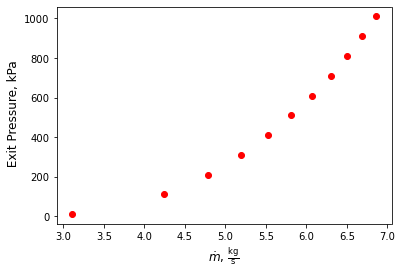

In [101]:
import matplotlib.pyplot as plt
plt.scatter(flowrates,exit_pres, color='red')
plt.xlabel(r'$\dot m$, $\frac{\mathrm{kg}}{\mathrm{s}}$',  fontsize=12)
plt.ylabel(r' Exit Pressure, kPa',  fontsize=12)
plt.show()

> As can be seen,  he required mass flowrate increases as exit pressure increases. This is because the exit enthlpy also increases with increasing pressure, resulting in a smaller difference in specific enthalpy between the inlet and exit. Thus, to compensate for the smaller different, a larger mass flowrate is required.

### Open System Analysis with Variable Specific Heats

```{index} shomate, variable specific heat
```

Without readily available equations of state (such as those in Cantera) it is typical to evaluate thermodynamic processes with ideal gases using specific heats. However, if there is a large change in temperature during the process (e.g., in a turbine), then assuming constant specific heats may not be a good approxomation. But often, we may not know a priori what the inlet or exit temperature is, and thus the question of what temperature range should be used to evaluate specific heat arises. Recall, for an ideal gas that 

$\Delta h = \int_{1}^{2} c_{\rm p} dT$

We discussed prior in section {numref}`specific_heats` {ref}`specific_heats` that to use variable specific heats and intrgrate over a temperature range we can use the {ref}`Shomate Equation<genindex>` - an example was discussed in {numref}`cpExample2` {ref}`cpExample2`. The Shomate equation is

$c_{\rm p} = A + BT + CT^2 + DT^3 + \frac{E}{T^2}$

and thus the integrated form to determine change in enthalpy is

$\Delta h = \left. AT + \frac{BT^2}{2} + \frac{CT^3}{3} + \frac{DT^4}{4} - \frac{E}{T}  \right|_{T_1}^{T_2}$

Using a pencil and paper approach to solve a problem this way would be tedious and require trial and error, guessing the appropriate temperature until the energy equation is satisfied. However, since we are working with Python, we can take advantage of its built in solvers and/or minimization routines to help solve problems like this more easily. For example, lets assume we know the power output of an nitrogen-based gas turbine is 500 MW and the inlet temperature and pressure are 500 <sup>o</sup>C and 1.1 MPa. We also know that the mass flowrate is 50 kg/s and wish to know the exit temperature. The simplified open system energy conservation equation in this case is:

$\dot W_{\rm net} = \dot m (h_{\rm i}-h_{\rm e}) = \dot m \Delta h$

Becuase this is a gas turbine and we are assuming ideal gas behavior, the pressure is actually superfluous information. Let's define a function for the enthalpy, i.e.:

In [28]:
def h(T):
    return (A*(T/1000)+B*(T/1000)**2/2+C*(T/1000)**3/3+D*(T/1000)**4/4-E/(T/1000)) #kJ/mol

We can find the parameters A,B,C, etc. from the NIST Chemistry Webook (https://webbook.nist.gov/chemistry/name-ser/). What you will notice for N<sub>2</sub> is that there are different fitting parameters for different temperatures, as seen below.

```{figure} Figures/shomate_equation_2.png
:name: first law open fig b

Shomate equation and fitting parameters for nitrogen, obtained from NIST Chemistry WebBook (https://webbook.nist.gov/chemistry/)
```

For the purposes of this example, we will also only use the fit for the temperature range 500-2000 K to limit the computational complexity. Also, notice the units of enthalpy after integration are in kJ/mol. To be consistent with our example we will need to convert from mol to kg - thus we will divide our change in enthalpy by 28 g/mol and multiply by 1000 to convert from g to kg. Before using more elaborate solution solutions, lets just try a guess and check approach. To do this we can define a function $func$ which should equal zero if our exit temperature is correct. I.e.:

In [45]:
A,B,C,D,E = 28.99,1.85,-9.65,16.64,.00012
W_net,m_dot,Ti = 500*10*3, 50, 773.15 # Work in kW, T in K
def func(T):
    return W_net - m_dot*(h(Ti)-h(T))*1000/28 # divided by 28 because of the mole to g conversion. Multiplied by 1000 to convert from g to kg

We can guess $T$<sub>e</sub>, for example 600 K. 

In [46]:
func(600)

5365.913331265707

then 400K

In [47]:
func(400)

-5217.670002067618

and finally 500 K where we see it is approaching zero.

In [48]:
func(500)

31.61095031333025

Of course, we could also plot our function versus temperature to see exactly where it approaches zero, like below.

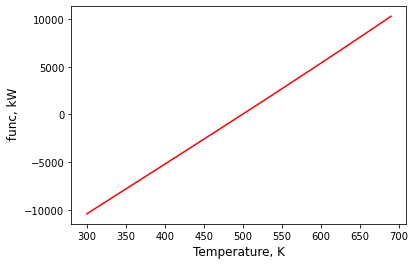

In [55]:
import matplotlib.pyplot as plt
import numpy as np
temps = np.arange(300,700,10)
plt.plot(temps,func(temps), color='red')
plt.xlabel(r'Temperature, K',  fontsize=12)
plt.ylabel(r' func, kW',  fontsize=12)
plt.show()

We can also solve directly for the exit temperature using the *fsolve* function within *scipy.optimize* package, like below. We just need to give an initial guess.

In [57]:
import numpy as np
from scipy.optimize import fsolve
A,B,C,D,E = 28.99,1.85,-9.65,16.64,.00012
W_net,m_dot,Ti = 500*10*3, 50, 773.15 # Work in kW, T in K
def func(T):
    return W_net - m_dot*(h(Ti)-h(T))*1000/28 # divided by 28 because of the mole to g conversion. Multiplied by 1000 to convert from g to kg
root = fsolve(func, 300)
print("The exit temperature is ", round(root[0],2), " K.")


The exit temperature is  499.4  K.


Let's see how this compares to using Cantera to solve for exit enthalpy directly, and subsequently exit temperature.

In [66]:
import cantera as ct
import numpy as np
species1 = ct.Nitrogen()
W_net,m_dot,Ti = 500*10*3, 50, 773.15 # Work in kW, T in K
species1.TP = Ti,100000 # K and kPa, inlet conditions
hi = species1.TH[1] # inlet enthalpy in J/kg
he = hi/1000-W_net/m_dot# from W_net = m_dot*(hi-he)
species1.HP = he*1000,100000
print("The exit temperature is ", round(species1.TP[0],2), " K.")

The exit temperature is  495.94  K.


As seen, the answer is slightly less than what we calculated using the Shomate equation. However, lets also compare to the assumption of constant specific heat. We can get the value of $c_{\rm p}$ at 300K from Cantera

In [72]:
import cantera as ct
import numpy as np
W_net,m_dot,Ti = 500*10*3, 50, 773.15 # Work in kW, T in K
species1 = ct.Nitrogen()
cp = species1.cp/1000 # kJ/kg/K
Te = Ti-W_net/m_dot/cp
print("The exit temperature is ", round(Te,2), " K.")

The exit temperature is  484.85  K.


(Exercise5)=
### Exercise 5

1. Air enters a 1-m<sup>2</sup> pipe at 100 kPa and 20°C with a velocity of 180 m/s. Determine the volumetric flow rate, in m3/s, at the  inlet and the mass flow rate, in kg/s, at the exit.
1. Air enters a nozzle steadily at 2.21 kg/m3 and 40 m/s and leaves at 0.762 kg/m3 and 180 m/s. If the inlet area of the nozzle is 90 cm2, determine (a) the mass flow rate through the nozzle, and (b) the exit area of the nozzle.
1. Water is heated in an insulated, constant-diameter tube by a 7-kW electric resistance heater. If the water enters the heater steadily at 20°C and leaves at 75°C, determine the mass flow rate of water.
1. Saturated liquid water is heated in a steady-flow steam boiler at a constant pressure of 2 MPa at a rate of 4 kg/s to an outlet temperature of 250°C. Determine the rate of heat transfer in the boiler.
1. Steam enters an adiabatic turbine at 8 MPa and 500°C at a rate of 3 kg/s and leaves at 20 kPa. If the power output of the turbine is 2.5 MW, determine the temperature of the steam at the turbine exit. Neglect kinetic energy changes.
1. An adiabatic air compressor compresses 10 L/s of air at 120 kPa and 20°C to 1000 kPa and 300°C. Determine (a) the work required by the compressor, in kJ/kg, and (b) the power required to drive the air compressor, in kW.
1. A portion of the steam passing through a steam turbine is sometimes removed for the purposes of feedwater heating. Consider an adiabatic steam turbine with 12.5 MPa and 550°C steam entering at a rate of 20 kg/s. Steam is bled from this turbine at 1000 kPa and 200°C with a mass flow rate of 1 kg/s. The remaining steam leaves the turbine at 100 kPa and 100°C. Determine the power produced by this turbine.
1. A well-insulated valve is used to throttle steam from 8 MPa and 350°C to 2 MPa. Determine the final temperature of the steam.
1. Refrigerant-134a at 1 MPa and 90°C is to be cooled to 1 MPa and 30°C in a condenser by air. The air enters at 100 kPa and 27°C with a volume flow rate of 600 m3/min and leaves at 95 kPa and 60°C. Determine the mass flow rate of the refrigerant.
1. Steam is to be condensed in the condenser of a steam power plant at a temperature of
50°C with cooling water from a nearby lake, which enters the tubes of the condenser at
18°C at a rate of 101 kg/s and leaves at 27°C. Determine the rate of condensation of the
steam in the condenser.
1.Two streams of water are mixed in an insulated container to form a third stream leaving
the container. The first stream has a flow rate of 30 kg/s and a temperature of 90°C. The
flow rate of the second stream is 200 kg/s, and its temperature is 50°C. What is the
temperature of the third stream?
1. The turbocharger of an internal combustion engine consists of a turbine and a compressor. Hot exhaust gases flow through the turbine to produce work, and the work output from the turbine is used as the work input to the compressor. The pressure of ambient air is increased as it flows through the compressor before it enters the engine cylinders. Thus, the purpose of a turbocharger is to increase the pressure of air so that more air gets into the cylinder. Consequently, more fuel can be burned and more power can be produced by the engine. In a turbocharger, exhaust gases enter the turbine at 400°C and 120 kPa at a rate of 0.02 kg/s and leave at 350°C. Air enters the compressor at 50°C and 100 kPa and leaves at 130 kPa at a rate of 0.018 kg/s. The compressor increases the air pressure with a side effect: It also increases the air temperature, which increases the possibility that a gasoline engine will experience an engine knock. To avoid this, an aftercooler is placed after the compressor to cool the warm air with cold ambient air before it enters the engine cylinders. It is estimated that the aftercooler must decrease the air temperature below 80°C if knock is to be avoided. The cold ambient air enters the aftercooler at 30°C and leaves at 40°C. Disregarding any frictional losses in the turbine and the compressor and treating the exhaust gases as air, determine:
    1. the temperature of the air at the compressor outlet and
    1. the minimum volume flow rate of ambient air required to avoid knock.
1. A 2 m3 rigid insulated tank initially containing saturated water vapor at 1 MPa is connected through a valve to a supply line that carries steam at 400°C. Now the valve is opened, and steam is allowed to flow slowly into the tank until the pressure in the tank rises to 2 MPa. At this instant the tank temperature is measured to be 300 °C. Determine the mass of the steam that has entered and the pressure of the steam in the supply line.
1. A 2 m3 rigid tank initially contains air at 100 kPa and 22°C. The tank is connected to a supply line through a valve. Air is flowing in the supply line at 600 kPa and 22°C. The valve is opened, and air is allowed to enter the tank until the pressure in the tank reaches the line pressure, at which point the valve is closed. A thermometer placed in the tank indicates that the air temperature at the final state is 77°C. Determine (a) the mass of air that has entered the tank and (b) the amount of heat transfer.
2. 1. Steam enters a turbine through a 1 m diameter pipe at *_V_* = 2 m/s. The steam is at *_T_* = 700 K and *_P_* = 5 MPa and it leaves at 1 MPa at *_T_* = 400 K . Assume no heat is lost during this process, the system is steady-state, and gravitational effects are negligible. What is the power (*_P_*) created by the steam on the turbine?
2. A compressor in a refrigerator uses the refrigerant r-134a. The refrigerant enters the compressor at 1 L/s. the refrigerant is a saturated liquid at *_T_* = -10°C when it enters. The refrigerant leaves the compressor at *_P_* = 500 kPa and *_T_* = 10°C. Assume no heat is lost during this process, the system is steady-state, and gravitational effects are negligible. What is the power (*_P_*) required for the compressor?
3. Water enters a heat exchanger at a rate of 20 kg/s as a saturated water vapor at *_P_* = 1 MPa. The water cools until is has a vapor mass fraction of 50%. At this point water is rerouted from the heat exchanger at a rate of 4 kg/s. The remaining fluid continues in the heat exchanger until the water is a saturated liquid. What is the heat transfer (*_Q_*) from the water to the heat exchanger?
4. Water is throttled at 5 MPa as a saturated liquid. If the temperature (*_T_*) drops 15°C during this process, what is the pressure (*_P_*) change?
5. A condensor uses a steady flow of nitrogen at *_T_* = 225 K and 1 bar at 50L/s to cool water in a tube passing through it. The water enters at 1L/s as a saturated vapor at 1 MPa and leaves as a saturated fluid. If the nitrogen stays at a constant pressure, what is the final temperature of the nitrogen leaving the condensor?

{numref}`Exercise5Solutions` {ref}`Exercise5Solutions`